# Introduction
RMS Titanic was a British passenger liner, operated by the White Star Line, that sank in the North Atlantic Ocean on 15 April 1912 after striking an iceberg during her maiden voyage from Southampton, England, to New York City, United States. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making it the deadliest sinking of a single ship up to that time. It remains the deadliest peacetime sinking of an ocean liner or cruise ship.

<font color = 'blue'>
Content: 

1. [Load and Check Data](#1)
1. [Variable Description](#2)
    * [Univariate Variable Analysis](#3)
        * [Categorical Variable](#4)
        * [Numerical Variable](#5)
1. [Basic Data Analysis](#6)
1. [Outlier Detection](#7)
1. [Missing Value](#8)
    * [Find Missing Value](#9)
    * [Fill Missing Value](#10)
1. [Visualization](#11)
    * [Correlation Between Sibsp -- Parch -- Age -- Fare -- Survived](#12)
    * [SibSp -- Survived](#13)
    * [Parch -- Survived](#14)
    * [Pclass -- Survived](#15)
    * [Age -- Survived](#16)
    * [Pclass -- Survived -- Age](#17)
    * [Embarked -- Sex -- Pclass -- Survived](#18)
    * [Embarked -- Sex -- Fare -- Survived](#19)
    * [Fill Missing: Age Feature](#20)
1. [Feature Engineering](#21)
    * [Name -- Title](#22)
    * [Family Size](#23)
    * [Embarked](#24)
    * [Ticket](#25)
    * [Pclass](#26)
    * [Sex](#27)
    * [Drop Passenger ID and Cabin](#28)
1. [Modeling](#29)
    * [Train - Test Split](#30)
    * [Simple Logistic Regression](#31)
    * [Hyperparameter Tuning -- Grid Search -- Cross Validation](#32) 
    * [Ensemble Modeling](#33)
    * [Prediction and Submission](#34)

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-bright")

import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Load and Check Data
<a id="1"></a><br/>

In [3]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
test_passenger_id = test_df["PassengerId"]  # for submission file

In [4]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Variable Description
<a id="2"></a>
Feature description for helping us to understand data.

1. PassengerId: unique id number to each passenger
2. Survived: passenger survive(1) or died(0)
3. Pclass: passenger class a proxy for socio-economic status (SES) (1st = Upper, 2nd = Middle, 3rd = Lower)
4. Name: name
5. Sex: male, female
6. Age: age of passenger
7. SibSp: number of siblings/spouses in Titanic
8. Parch: number of parents/children in Titanic
9. Ticket: ticket number
10. Fare: amount of money spent on ticket
11. Cabin: cabin category
12. Embarked: port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)

In [7]:
train_df.info()  # object: actually string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* float64(2): Fare ve Age
* int64(5): Pclass, sibsp, parch, passengerId and survived
* object(5): Cabin, embarked, ticket, name and sex

## Univariate Variable Analysis

UVA means that we analyze one variable. We will try to understand just one variable. For example, we will try to understand survived variable.
<a id="3"></a>
* Categorical Variable Analysis
* Numerical Variable Analysis

### Categorical Variable
<a id="4"></a>
Categorical variable is that take values in each of a set of categories. For example, survived variable is categorical variable and take 0 and 1 values.
Survived, Sex, Pclass, Embarked, Cabin, Name, Ticket, Sibsp and Parch are categorical variables.

In [8]:
def bar_plot(variable):
    """
    input: variable ex is Sex. output: bar plot + value count
    """
    variable = train_df[variable] # get feature (variable)
    variable_value = variable.value_counts()  # count number of categorical variable (for ex: sex)

    # visualize
    plt.figure(figsize = (9, 3))
    plt.bar(variable_value.index, variable_value)  # category name: x axis, variable_value: y axis
    plt.xticks(variable_value.index, variable_value.index.values)
    plt.ylabel("Frequency")
    plt.title(variable.name)
    plt.show()
    print("{}: \n {}".format(variable.name, variable_value))

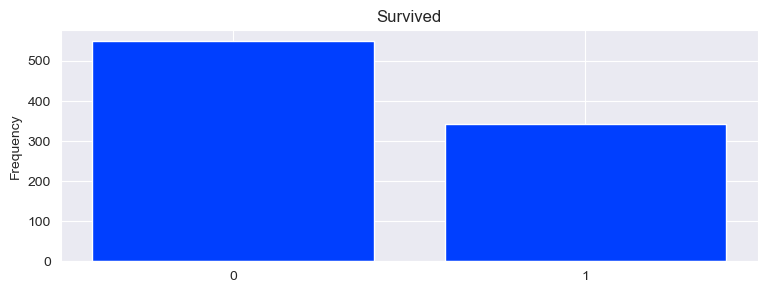

Survived: 
 0    549
1    342
Name: Survived, dtype: int64


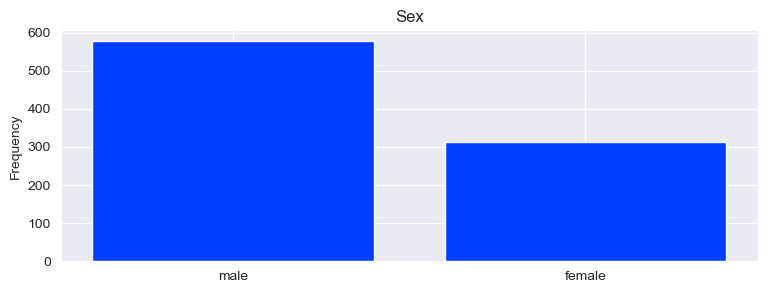

Sex: 
 male      577
female    314
Name: Sex, dtype: int64


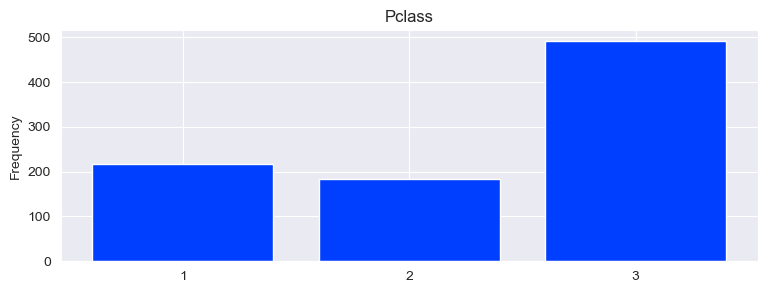

Pclass: 
 3    491
1    216
2    184
Name: Pclass, dtype: int64


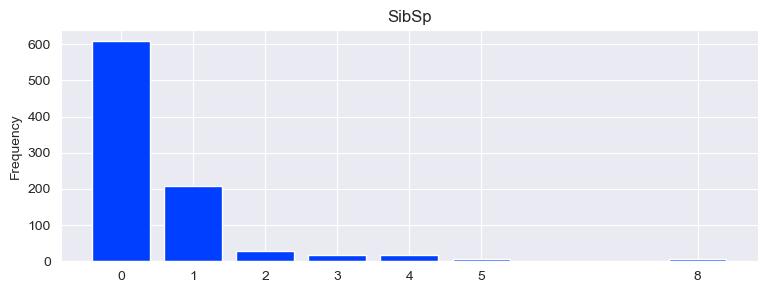

SibSp: 
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


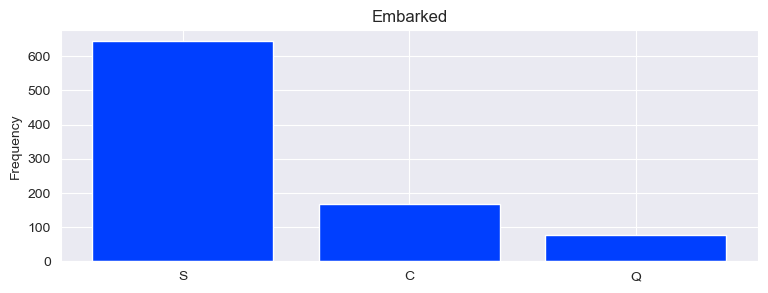

Embarked: 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


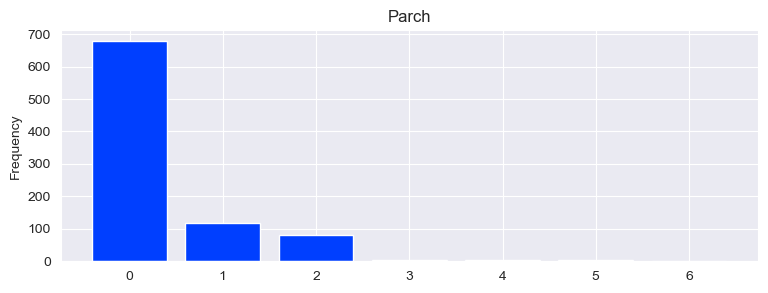

Parch: 
 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [9]:
categorical_features = ["Survived", "Sex", "Pclass", "SibSp", "Embarked", "Parch"]
for c in categorical_features:
    bar_plot(c)

Data is imbalanced. Because number of survived(1) is less than number of not survived(0).
Pclass: 3rd class is the most crowded class. 3rd class is the cheapest class.
Embarked: Most of the passengers embarked from Southampton.
SibSp: Most of the passengers traveled alone. (0)
Parch: Most of the passengers traveled alone. (0)

In [10]:
categorical_features2 = ["Cabin", "Name", "Ticket"]
for c in categorical_features2:
    print("{} \n".format(train_df[c].value_counts()))

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64 

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64 

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64 



### Numerical Variable
<a id="5"></a>
Numerical variable is that take values in each of a set of numbers. For example, age variable is numerical variable.
Age and Fare are numerical variables.

In [11]:
def plot_hist(variable):
    plt.figure(figsize = (8, 3))
    plt.hist(train_df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency (Sample Count)")
    plt.title("{} distribution with histogram".format(variable))
    plt.show()

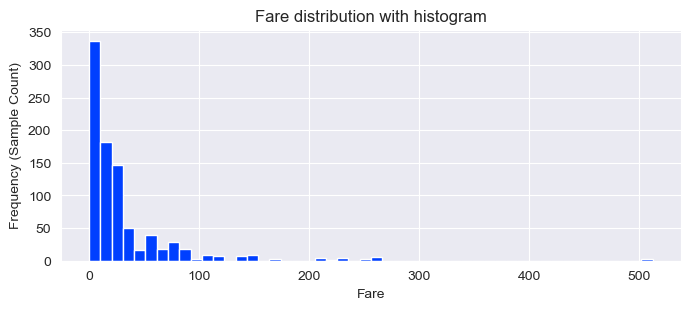

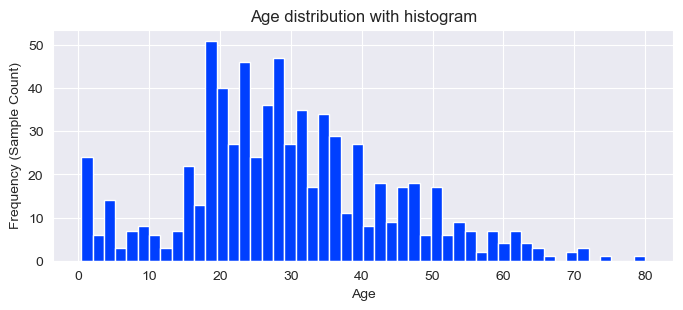

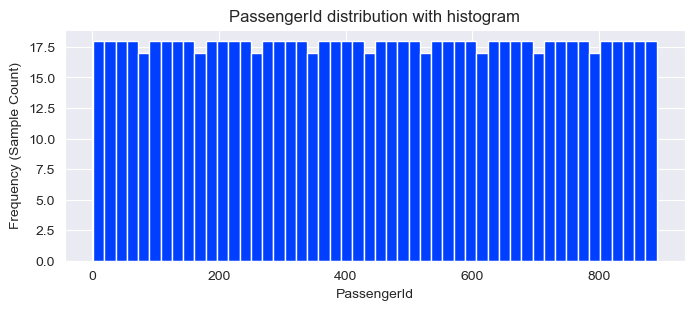

In [12]:
numeric_variable = ["Fare", "Age", "PassengerId"]
for n in numeric_variable:
    plot_hist(n)

PassengerId: it is unique id number to each passenger. It must be drop.
Fare: amount of money spent on ticket. Most of the passengers paid less than 100 for ticket.
Age: most of the passengers are between 20 and 30 years old.  There are babies(0-5) and older passengers(70) too. There are lots of babies.

## Basic Data Analysis
<a id="6"></a>

We will learn the relationship between some features.
* Pclass - Survived
* Sex - Survived
* SibSp - Survived
* Parch - Survived

#### Pclass vs Survived

In [13]:
train_df[["Pclass", "Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by = "Survived", ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


People with class 1 category have a higher probability of survival than other classes.

#### Sex - Survived

In [14]:
train_df[["Sex", "Survived"]].groupby(["Sex"], as_index= False).mean().sort_values(by = "Survived", ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Women are more likely to survive than men

#### SibSp - Survived

In [15]:
train_df[["SibSp", "Survived"]].groupby(["SibSp"], as_index= False).mean().sort_values(by = "Survived", ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


People with 0, 1 or 2 siblings are more likely to survive. Therefore, a new feature can be added. People who have less than 2 and more than 2 siblings

#### Parch - Survived

In [16]:
train_df[["Parch", "Survived"]].groupby(["Parch"], as_index= False).mean().sort_values(by = "Survived", ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


People with 0, 1, 2 or 3 parents/children are more likely to survive. Parch and SibSp can be used for new feature extraction.

## Outlier Detection
<a id="7"></a>
Outlier is a data point that differs significantly from other observations. Outliers can cause problems in statistical analyses.

In [17]:
def detect_outliers(df, features):
    outlier_indices = []

    for c in features:

        Q1 = np.percentile(df[c], 25)  # 1st quartile means 25% of all data. Median of 1st half of data.

        Q3 = np.percentile(df[c], 75)  # 3rd quartile means 75% of all data. Median of 2nd half of data.

        IQR = Q3 - Q1  # IQR is range of data. IQR = Q3 - Q1

        # outlier step
        outlier_step = IQR * 1.5  # if data is less than Q1 - outlier_step or greater than Q3 + outlier_step, it is outlier. (1.5 is standard value)

        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index  # outlier_list_col is list of outlier indeces

        # store indeces
        outlier_indices.extend(outlier_list_col)


    outlier_indices = Counter(outlier_indices)  # Counter function count number of each element (index) in list. For example, if outlier_indices = [1, 1, 1, 2, 2, 3], Counter(outlier_indices) = {1:3, 2:2, 3:1}.
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)  # if there are more than 2 outliers in a sample (row), we should delete them. So If there are 2 outliers in an index. We should not delete them.
    print("Outliers: ", multiple_outliers)
    return multiple_outliers

In [18]:
train_df.loc[detect_outliers(train_df, ["Age", "SibSp", "Parch", "Fare"])]

Outliers:  [27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [19]:
# drop outliers
train_df = train_df.drop(detect_outliers(train_df, ["Age", "SibSp", "Parch", "Fare"]), axis = 0).reset_index(drop = True) # reset_index(drop = True) means that we do not want to save old index.
train_df

Outliers:  [27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
876,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
877,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
878,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
879,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Missing Value
<a id="8"></a>
Missing value is that NaN or empty value. We should handle missing value. If we do not handle missing value, we can not train our model. Missing values are also checked in both test and train data.

In [20]:
train_df_len = len(train_df) # train_df_len is number of rows in train data.
train_df = pd.concat([train_df, test_df], axis = 0).reset_index(drop = True) # concat train and test data to handle missing value in both data.

In [21]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Find Missing Value
<a id="9"></a>

In [22]:
train_df.columns[train_df.isnull().any()] # columns that have missing value

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [23]:
train_df.isnull().sum() # number of missing value in each column

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1007
Embarked          2
dtype: int64

We will only fill in the empty values in mouse and embarked. Because we do not have detailed information about others.

#### Fill Missing Value
<a id="10"></a>

Embarked has 2 missing values.
Fare has only 1 missing value.

In [24]:
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


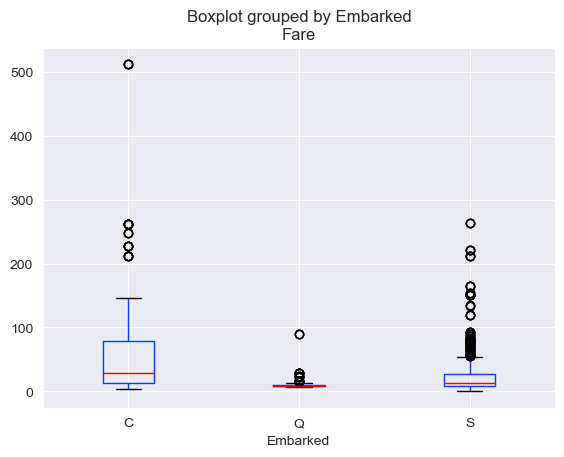

In [25]:
train_df.boxplot(column = "Fare", by = "Embarked")
plt.show()

Fare is related to Embarked. So we can fill in the missing value with C.

In [26]:
train_df["Embarked"] = train_df["Embarked"].fillna("C")

In [27]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1033,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [28]:
np.mean(train_df[train_df["Pclass"] == 3]["Fare"])

12.741219971469327

In [29]:
train_df["Fare"] = train_df["Fare"].fillna(np.mean(train_df[train_df["Pclass"] == 3]["Fare"]))

In [30]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


## Visualization
<a id="11"></a>

### Correlation Between SibSp -- Parch -- Age -- Fare -- Survived
<a id="12"></a>
Correlation is a statistical technique that can show whether and how strongly pairs of variables are related.

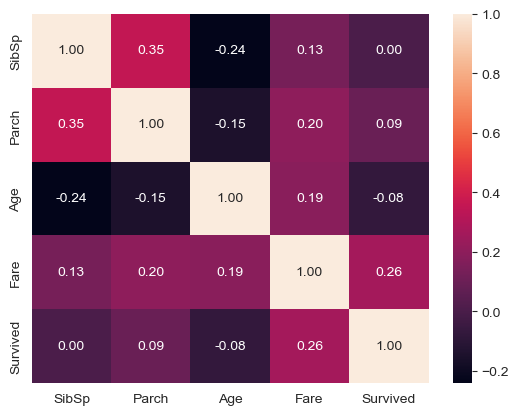

In [31]:
list1 = ["SibSp", "Parch", "Age", "Fare", "Survived"]
sns.heatmap(train_df[list1].corr(), annot = True, fmt = ".2f")  # annot = True means that we want to see correlation values in heatmap. fmt = ".2f" means that we want to see 2 digits after comma.
plt.show()

Fare feature seems to have correlation with survived feature (0.26). There is a relationship between mice and survival. The more money the passengers paid, the higher their chances of survival.

### SibSp -- Survived
<a id="13"></a>

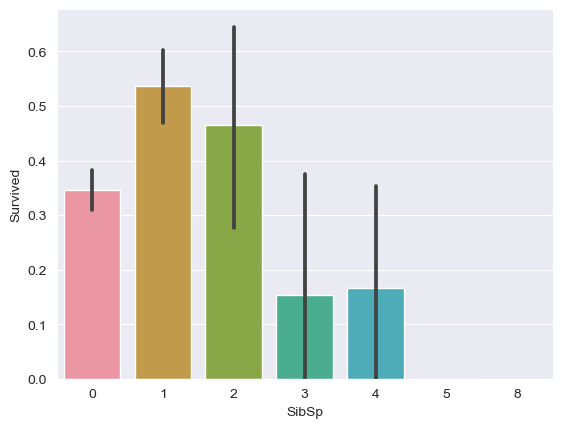

In [32]:
g = sns.barplot(x = "SibSp", y = "Survived", data = train_df)  # factorplot is used to show categorical variables.
plt.show()

* If there is more than 2 sibsp, the probability of death increases.
* We can consider a new feature describing these categories. For example, if SibSp is more than 2, we can assign 2, otherwise we can assign 1.
* Having 2 or less siblings or spouses has a higher chance of survival.

### Parch -- Survived
<a id="14"></a>

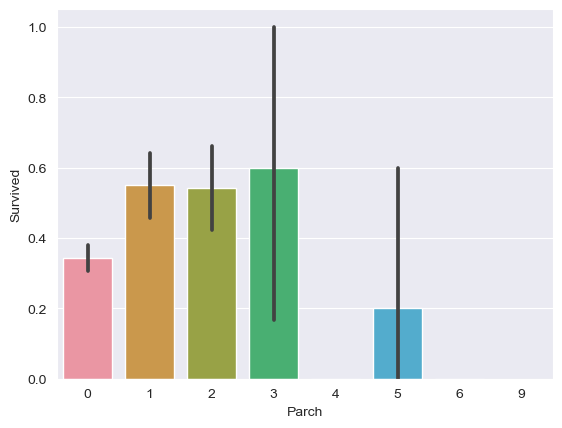

In [33]:
g = sns.barplot(x = "Parch", y = "Survived", data = train_df)
plt.show()

* Small families have a better chance of survival than larger families and those traveling alone.
* For those with a Patch value of 3, it varies between 0.2 and 1. (Standard deviation)
* SibSp and Parch can be used for new feature extraction with threshold = 3.
* There is a standard deviation in survival rates for those with a Parch value of 3.

### Pclass -- Survived
<a id="15"></a>

<Axes: xlabel='Pclass', ylabel='Survived'>

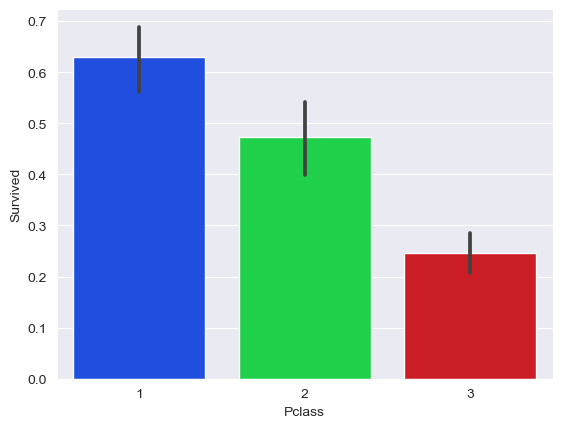

In [34]:
sns.barplot(x = "Pclass", y = "Survived", data = train_df)

* The higher the class, the higher the chance of survival.
* Pclass is an important feature for the model.

### Age -- Survived
<a id="16"></a>

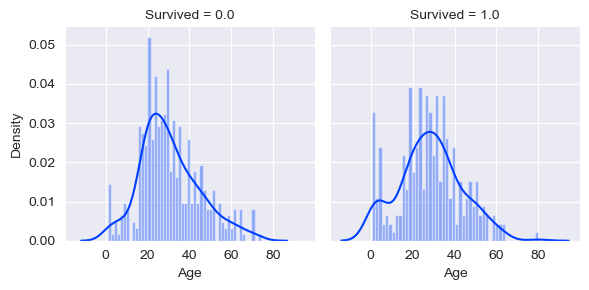

In [35]:
g = sns.FacetGrid(train_df, col = "Survived")  # FacetGrid is used to show multiple plots in one figure.
g.map(sns.distplot, "Age", bins = 50) # distplot is used to show distribution of a variable.
plt.show()

* The children were saved.
* Age <= 10 has a high survival rate.
* Oldest passengers (80) survived. (Although very few)
* Large number of 20 years old did not survive.
* most passengers are in 15-35 age range.
* use age distribution for missing value of age.
* use age feature in training.

### Pclass -- Survived -- Age
<a id="17"></a>

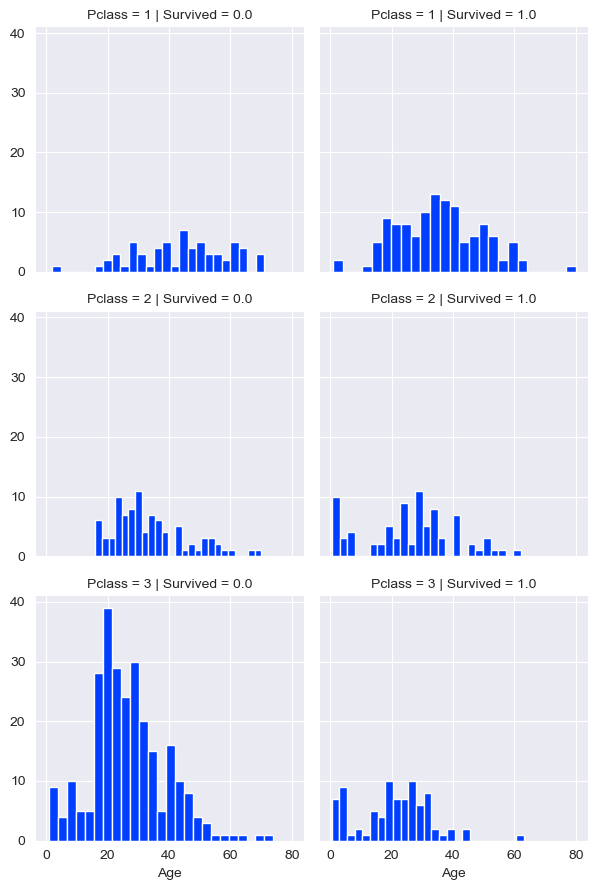

In [36]:
g = sns.FacetGrid(train_df, col = "Survived", row = "Pclass")
g.map(plt.hist, "Age", bins = 25) # X axis is age, Y axis is number of people.
g.add_legend()
plt.show()

Pclass 1 has a high survival rate, especially for children. Pclass 3 has a very low survival rate for passengers between 20 and 40 years old.
Pclass is an important feature for the model.

### Embarked -- Sex -- Pclass -- Survived
<a id="18"></a>

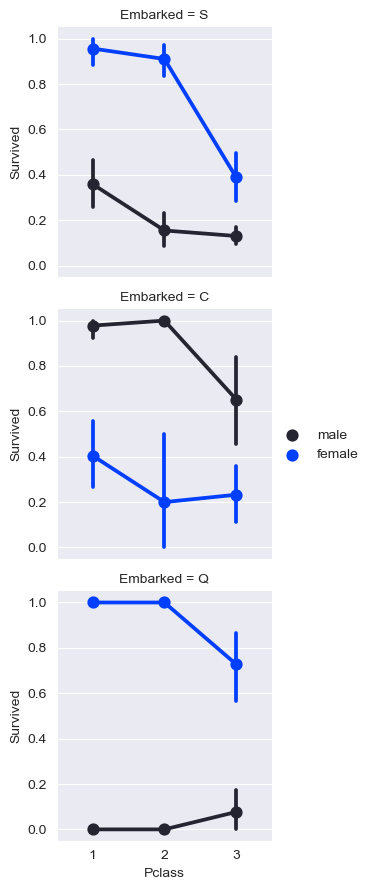

In [37]:
g = sns.FacetGrid(train_df, row = "Embarked")  # row = "Embarked" means that we want to see Embarked in rows.
g.map(sns.pointplot, "Pclass", "Survived", "Sex")
g.add_legend()
plt.show()

Sex and survival are related.
Female passengers have much better survival rate than males
Males have better survival rate in Pclass 3 in C.
Embarked and sex will be used in training

### Embarked -- Sex -- Fare -- Survived
<a id="19"></a>

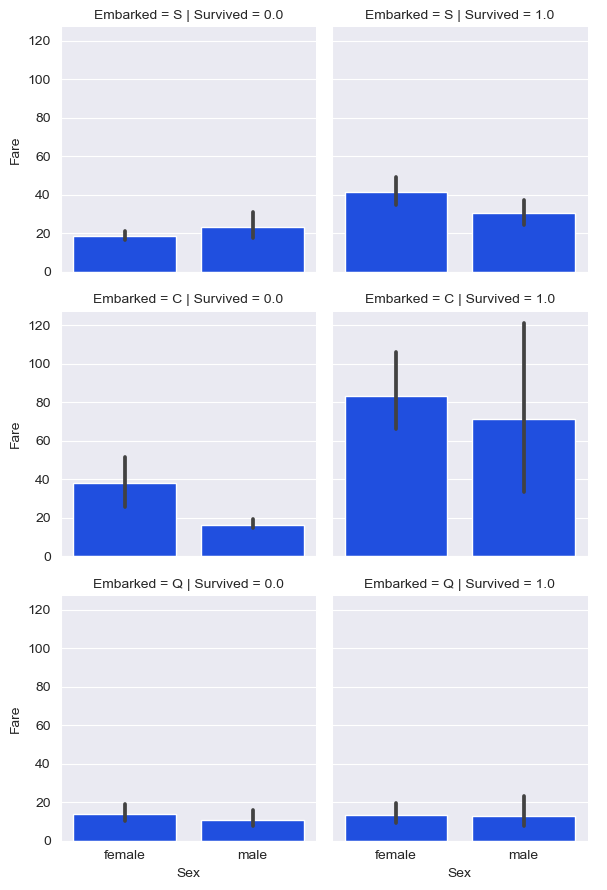

In [38]:
g = sns.FacetGrid(train_df, row = "Embarked", col = "Survived")  # col = "Survived" means that we want to see Survived in columns. row = "Embarked" means that we want to see Embarked in rows.
g.map(sns.barplot, "Sex", "Fare")  # barplot is used to show mean of a variable.
g.add_legend()
plt.show()

* Usually, passengers who pay more have a higher survival rate. Fare can be used as categorical for training. For example: 0-25 :0, 25-50 :1, 50-75 :2,
* In Port S, C, those who paid more survived the most. However, In port Q the difference is small.
* Embarked can be used in training.
* Female survivors paid more than men.